In [5]:
"""
This NN is build following the Sentdex Tutorial found here:
Deep Learning with Python, TensorFlow, and Keras tutorial - https://www.youtube.com/watch?v=wQ8BIBpya2k
"""
import tensorflow as tf
# %matplotlib inline 
import matplotlib.pyplot as plt


# Get the mnist dataset
mnist = tf.keras.datasets.mnist

# Unpack training and test datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Original X shape", X_train.shape)
print("Original Y shape", Y_train.shape)

"""
 https://www.ics.uci.edu/~mohamadt/keras_mnist.html
 Testing canvas image to flask to predict lead to some errors with the array shape.
 After some research I found the solution to be that it needs to be reshaped prior to training 
"""

# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255

print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)
print("Y_train[0] ", Y_train[0])

# # Normalize the data to between 0-1 rather than 0-255
# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

# Sequential model (add layer by layer), less complex than a functional model
model = tf.keras.models.Sequential()

# Use keras to flatten our input layer to a single dimension array
# model.add(tf.keras.layers.Flatten(input_shape=(784)))
# 128 neurons, relu (rectified linear) as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu,input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Output Layer - 10 neurons, using Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Training params for the model: using 'adam' optimizer, loss for degree of error, return accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, Define 'epochs', how many times we run the training
model.fit(X_train, Y_train, epochs=3)



Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)
Y_train[0]  5
Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2316 - acc: 0.9322
Epoch 2/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0972 - acc: 0.9701
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0680 - acc: 0.9789


In [6]:
# Calculate the loss and accuracy validations
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0742 - acc: 0.9774
0.0741552268156549 0.9774


In [8]:
# Save the model
model.save('numberPredictor.h5')

In [9]:
# Load the saved Model
working_model = tf.keras.models.load_model('numberPredictor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Predictions is the loaded model predicting what number it has been given from the test set
predictions = working_model.predict([X_test])
print(predictions)

[[6.2619250e-07 4.6378750e-06 2.5454779e-05 ... 9.9989843e-01
  1.3449841e-06 3.8400616e-05]
 [6.2954015e-08 1.5632308e-05 9.9998176e-01 ... 1.0175439e-08
  5.1707680e-08 2.8914429e-10]
 [1.2114575e-07 9.9903524e-01 1.1187329e-04 ... 1.8841791e-04
  2.7816423e-04 1.6330021e-06]
 ...
 [2.3647076e-10 1.3161342e-08 1.0177782e-09 ... 2.6402788e-05
  9.8740918e-07 4.0897357e-06]
 [1.2538927e-06 1.7515413e-07 7.5747195e-09 ... 3.9677229e-04
  4.6606679e-04 6.5488152e-08]
 [2.4133145e-10 1.1809413e-10 2.4370175e-09 ... 1.6442181e-11
  2.9822975e-10 7.9000410e-11]]


In [21]:
# Using numpy to display the predicted number in the list
import numpy as np
print(np.argmax(predictions[90]))

3


Before Reshape (784,)
After Reshape (784,)


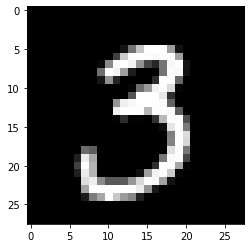

In [22]:
# Using matplotlib to display the predicted number for comparison
print("Before Reshape", X_test[90].shape)
plt.imshow(X_test[90].reshape(28, 28), cmap="gray")
print("After Reshape",X_test[90].shape)
plt.show()